In [3]:
import warnings
warnings.filterwarnings('ignore')
# Import libraries
import glob
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import itertools
import plotly.io as pio
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression, HuberRegressor, ElasticNet
from sklearn.utils.validation import check_is_fitted
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import load_model
from tensorflow import keras
from keras import regularizers
# from scikeras.wrappers import KerasRegressor

# Loading saved data

In [4]:
#reading the saved data from last notebook
df = pd.read_csv('aggregated_data.csv', index_col=0, parse_dates=True)
df.head()

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,year,month,day,hour,week_of_year
2010-01-01 00:00:00,1.9,-0.5,84.25,0.417,100.0,"rain,snow",0.0,0.0,19.4,11.0,999.9,62.2,0.0,0.0,0.0,2010,1,1,0,53
2010-01-01 01:00:00,1.9,-0.5,83.90,0.000,0.0,na,0.0,0.0,21.8,19.0,999.8,22.4,0.0,0.0,0.0,2010,1,1,1,53
2010-01-01 02:00:00,1.4,-0.7,85.76,0.000,0.0,na,0.0,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,0.0,2010,1,1,2,53
2010-01-01 03:00:00,1.4,-0.7,85.69,0.000,0.0,na,0.0,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,0.0,2010,1,1,3,53
2010-01-01 04:00:00,1.3,-0.8,85.72,0.000,0.0,na,0.0,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,0.0,2010,1,1,4,53


In [5]:
train_data = pd.read_csv('train_data.csv', index_col=0, parse_dates=True)
train_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105192 entries, 2010-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   temp              105192 non-null  float64
 1   dew               105192 non-null  float64
 2   humidity          105192 non-null  float64
 3   precip            105192 non-null  float64
 4   precipprob        105192 non-null  float64
 5   preciptype        105192 non-null  object 
 6   snow              105192 non-null  float64
 7   snowdepth         105192 non-null  float64
 8   windspeed         105192 non-null  float64
 9   winddir           105192 non-null  float64
 10  sealevelpressure  105192 non-null  float64
 11  cloudcover        105192 non-null  float64
 12  solarradiation    105192 non-null  float64
 13  solarenergy       105192 non-null  float64
 14  uvindex           105192 non-null  float64
 15  year              105192 non-null 

In [6]:
val_data = pd.read_csv('val_data.csv', index_col=0, parse_dates=True)
val_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2022-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              8760 non-null   float64
 1   dew               8760 non-null   float64
 2   humidity          8760 non-null   float64
 3   precip            8760 non-null   float64
 4   precipprob        8760 non-null   float64
 5   preciptype        8760 non-null   object 
 6   snow              8760 non-null   float64
 7   snowdepth         8760 non-null   float64
 8   windspeed         8760 non-null   float64
 9   winddir           8760 non-null   float64
 10  sealevelpressure  8760 non-null   float64
 11  cloudcover        8760 non-null   float64
 12  solarradiation    8760 non-null   float64
 13  solarenergy       8760 non-null   float64
 14  uvindex           8760 non-null   float64
 15  year              8760 non-null   int64  
 16  month 

In [7]:
test_data = pd.read_csv('test_data.csv', index_col=0, parse_dates=True)
test_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8892 entries, 2023-01-01 00:00:00 to 2024-01-06 11:00:00
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temp              8892 non-null   float64
 1   dew               8892 non-null   float64
 2   humidity          8892 non-null   float64
 3   precip            8892 non-null   float64
 4   precipprob        8892 non-null   float64
 5   preciptype        8892 non-null   object 
 6   snow              8892 non-null   float64
 7   snowdepth         8892 non-null   float64
 8   windspeed         8892 non-null   float64
 9   winddir           8892 non-null   float64
 10  sealevelpressure  8892 non-null   float64
 11  cloudcover        8892 non-null   float64
 12  solarradiation    8892 non-null   float64
 13  solarenergy       8892 non-null   float64
 14  uvindex           8892 non-null   float64
 15  year              8892 non-null   int64  
 16  month 

# Baseline Modeling


In [8]:
#function to model's performance
def measure_forecast_error(label, forecast):

    print('MAE = %.2f (degrees Celsius)' % mean_absolute_error(label, forecast))
    print('R2 = %.2f' % r2_score(label, forecast))

Our goal is to predict our feature values 24 hours prior for the next day. For solarenergy, considering seasonality and periodicity over the years a good baseline could be replicating previous years data to next year.

MAE = 0.21 (degrees Celsius)
R2 = 0.62


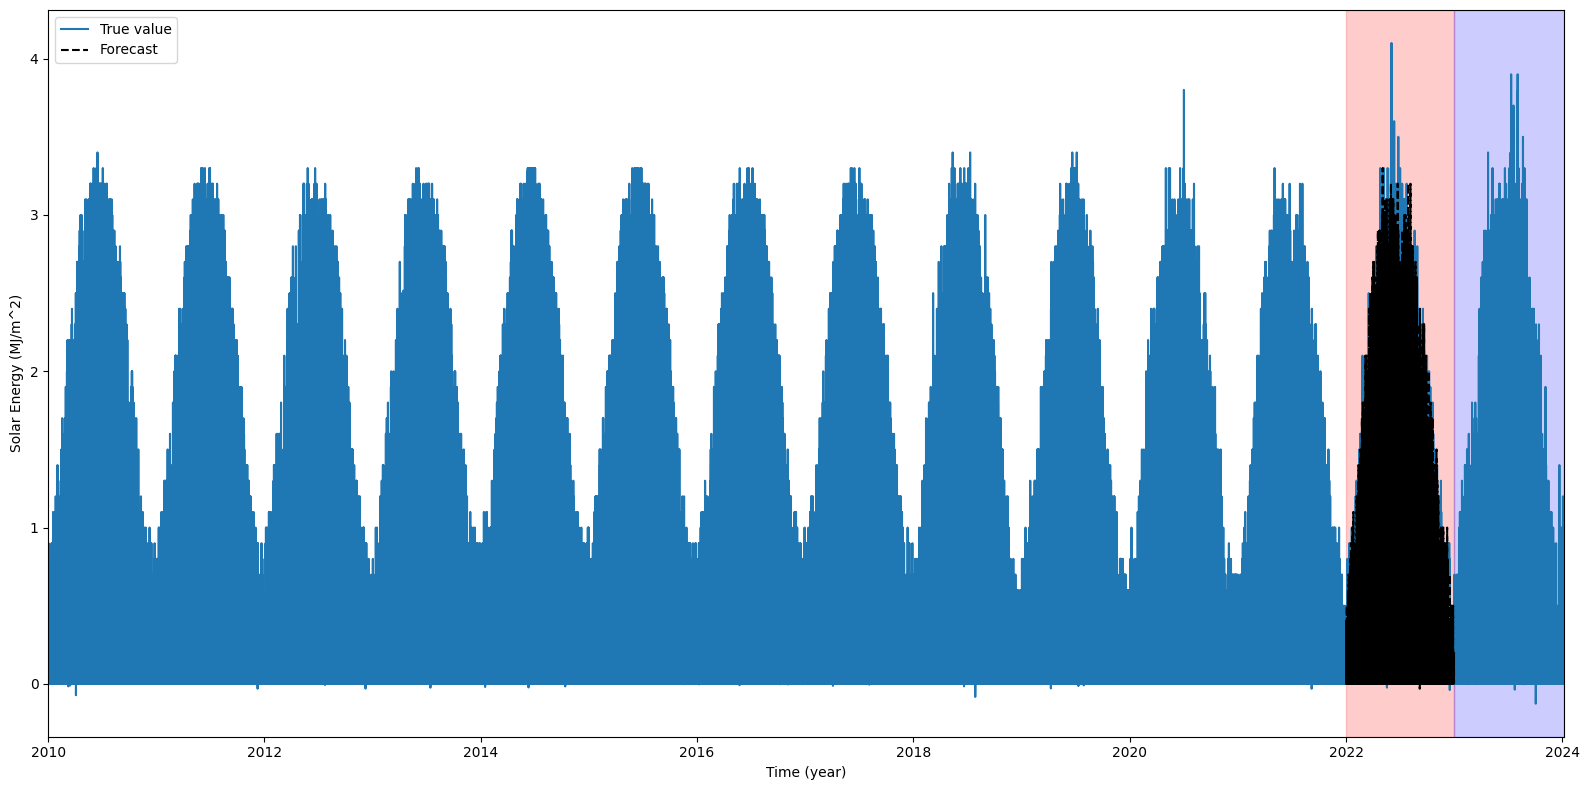

In [9]:
val_data['baseline_last_period'] = train_data.loc['2021']['solarenergy'].values

measure_forecast_error(val_data['solarenergy'], val_data['baseline_last_period'])

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(df.index, df['solarenergy'], label='True value')
ax.plot(val_data.index, val_data['baseline_last_period'], '--', color='k', label='Forecast')
ax.axvspan(val_data.index.min(), val_data.index.max(), alpha=.2, color='red')  # val_data set
ax.axvspan(test_data.index.min(), test_data.index.max(), alpha=.2, color='blue')  # test_data set
ax.set_xlabel('Time (year)')
ax.set_ylabel('Solar Energy (MJ/m^2)')
_=ax.set_xlim(train_data.index.min(), test_data.index.max())
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./baseline_periodicity.pdf', dpi=1000)

We are getting MAE of around 0.21 degrees which tells us that our value deviates only by .21 degrees from the actual, which is good and the R2 shows that our model is 62% accurate which we need to beat.

For Windspeed, we saw that our data was stationary around its mean. So, as a baseline having mean of values throughout seems a fair choice.

MAE = 6.77 (degrees Celsius)
R2 = -0.00


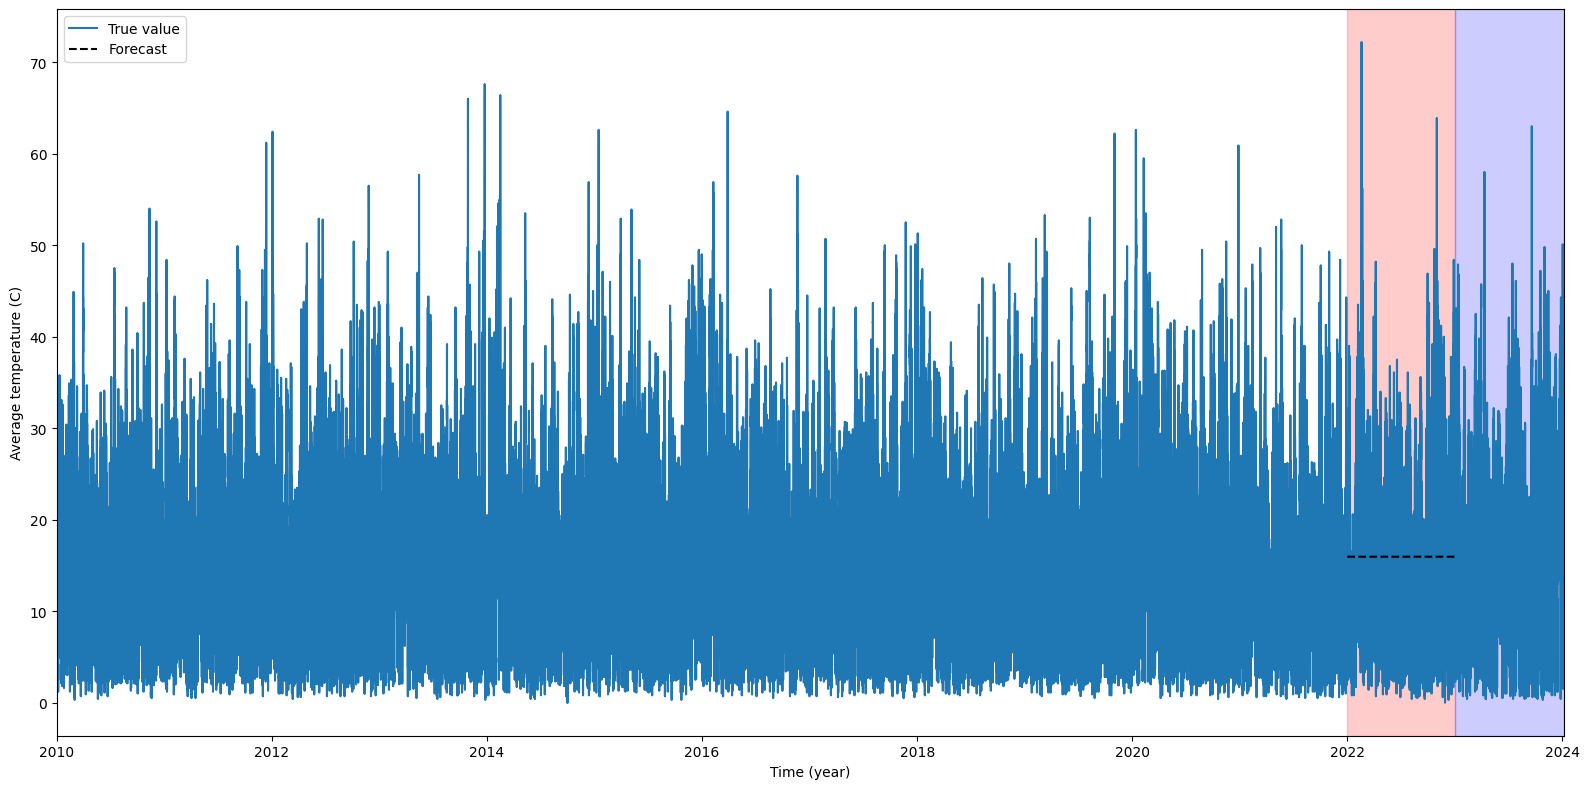

In [10]:
val_data['baseline_mean'] = train_data['windspeed'].mean()

measure_forecast_error(val_data['windspeed'], val_data['baseline_mean'])

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(df.index, df['windspeed'], label='True value')
ax.plot(val_data.index, val_data['baseline_mean'], '--', color='k', label='Forecast')
ax.axvspan(val_data.index.min(), val_data.index.max(), alpha=.2, color='red')  # val_data set
ax.axvspan(test_data.index.min(), test_data.index.max(), alpha=.2, color='blue')  # test_data set
ax.set_xlabel('Time (year)')
ax.set_ylabel('Average temperature (C)')
_=ax.set_xlim(train_data.index.min(), test_data.index.max())
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./baseline_mean.pdf', dpi=1000)

We are getting MAE of around 0.21 degrees which tells us that our value deviates only by .21 degrees from the actual, which is good and the R2 shows that our model is 62% accurate which we need to beat.

Our prediction is off by 6.77 degrees as per MAE which is high and a better model is required.

# Main Modeling - Solar Energy

Due to seasonality and how good the correlation was with lagged values for solar energy, modeling to predict 24 hours into the future with the past week's value of solarenergy.

### Data Prep

In [11]:
#reshaping and scaling
data = df['solarenergy'].values
data = data.reshape(-1, 1)
train = train_data['solarenergy'].values
train = train.reshape(-1, 1)
test = test_data['solarenergy'].values
test = test.reshape(-1, 1)
val = val_data['solarenergy'].values
val=val.reshape(-1, 1)
scaler = MinMaxScaler() #choosing minmax since there were a lot of outliers as seen during exploration
scaled_data = scaler.fit(train)
data = scaler.transform(data)
train_data = scaler.transform(train)
test_data= scaler.transform(test)
val_data = scaler.transform(val)

In [12]:
data

array([[0.02146077],
       [0.02146077],
       [0.02146077],
       ...,
       [0.0472118 ],
       [0.09871387],
       [0.17596696]])

In [13]:
# function to create sequences to feed to model
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length - 24 + 1):  # Adjusted to predict 24 hours ahead
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length+24-1])  # Target variable is solar energy 24 hours ahead
    return np.array(X), np.array(y)


In [14]:
seq_length = 24 * 7  # Number of hours in a week
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)
X_val, y_val = create_sequences(val_data, seq_length)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_val = y_val.reshape(-1)
print(f'{X_train.shape[1]},{X_train.shape[2]}')

168,1


In [15]:

#  LSTM model
model1 = Sequential()
model1.add(InputLayer((X_train.shape[1], X_train.shape[2])))
model1.add(LSTM(64))
model1.add(Dropout(0.25))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
print(X_train.shape) #checking if shape is appropriate
print(y_train.shape)

(105001, 168, 1)
(105001,)


In [17]:
# saving model
cp1 = ModelCheckpoint('model1/model_se.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=['mae'])


In [18]:
history_se = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=16,callbacks=[cp1]) #training

Epoch 1/20
6563/6563 [==============================] - 65s 9ms/step - loss: 0.0107 - mae: 0.0609 - val_loss: 0.0085 - val_mae: 0.0499
Epoch 2/20
6563/6563 [==============================] - 59s 9ms/step - loss: 0.0080 - mae: 0.0502 - val_loss: 0.0085 - val_mae: 0.0498
Epoch 3/20
6563/6563 [==============================] - 60s 9ms/step - loss: 0.0077 - mae: 0.0490 - val_loss: 0.0084 - val_mae: 0.0495
Epoch 4/20
6563/6563 [==============================] - 59s 9ms/step - loss: 0.0076 - mae: 0.0482 - val_loss: 0.0082 - val_mae: 0.0484
Epoch 5/20
6563/6563 [==============================] - 60s 9ms/step - loss: 0.0074 - mae: 0.0472 - val_loss: 0.0084 - val_mae: 0.0493
Epoch 6/20
6563/6563 [==============================] - 59s 9ms/step - loss: 0.0073 - mae: 0.0470 - val_loss: 0.0085 - val_mae: 0.0483
Epoch 7/20
6563/6563 [==============================] - 59s 9ms/step - loss: 0.0072 - mae: 0.0466 - val_loss: 0.0081 - val_mae: 0.0478
Epoch 8/20
6563/6563 [==============================] -

In [19]:
model1 = load_model('model1/model_se.keras') #loading saved model

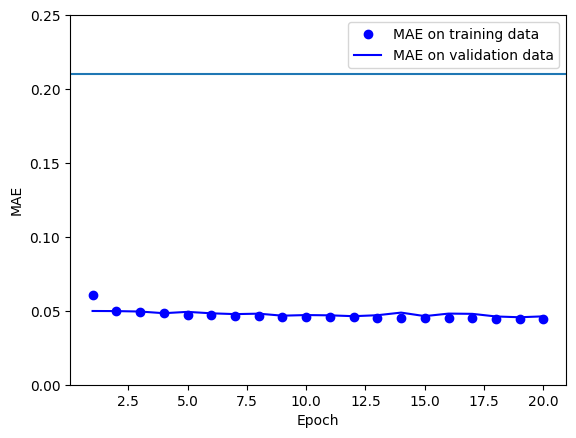

In [20]:
# Function to plot MAE over the epochs
def plot_hist_regression(hist, y):
  n_ = len(hist.history['mae'])
  plt.plot(range(1, n_+1), np.asarray(hist.history['mae']), 'bo', label='MAE on training data')
  plt.plot(range(1, n_+1), np.asarray(hist.history['val_mae']), 'b', label='MAE on validation data')
  plt.legend()
  plt.xlabel("Epoch")
  plt.ylabel("MAE")
  plt.ylim([0, 0.25])
  plt.axhline(y=y)
  plt.show()

plot_hist_regression(history_se, 0.21) #plotting to see model behavior over epochs


In [21]:
val_predictions = model1.predict(X_val).flatten() #predicting validation set

268/268 [==============================] - 1s 4ms/step


In [22]:
r2_val = r2_score(y_val, val_predictions) #R2 on validation set
print(f'R2 on validation set: {r2_val}')

R2 on validation set: 0.7916958988048314


In [23]:
mae_val = model1.evaluate(X_val, y_val)[1]
print('MAE on val data: %.2f degrees' % mae_val)

268/268 [==============================] - 2s 4ms/step - loss: 0.0078 - mae: 0.0456
MAE on val data: 0.05 degrees


In [24]:
test_predictions = model1.predict(X_test).flatten() #predicting test set

272/272 [==============================] - 1s 4ms/step


In [25]:
print('MAE on test data: %.2f degrees' % model1.evaluate(X_test, y_test)[1]) #test set evaluation

272/272 [==============================] - 1s 4ms/step - loss: 0.0094 - mae: 0.0502
MAE on test data: 0.05 degrees


The model beat the baseline in terms of MAE and R2 implying it is a better fit.

In [26]:
val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1)).flatten()
actuals = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':actuals})
val_results

,Val Predictions,Actuals
0,0.008386,0.0
1,0.009105,0.0
2,0.008709,0.0
3,0.006550,0.0
4,0.005633,0.0
...,...,...
8564,0.022530,0.0
8565,0.018412,0.0
8566,0.015339,0.0
8567,0.013390,0.0


In [27]:
# linking back values to date
v_predictions_df = pd.DataFrame(val_predictions)
v_predictions_df.columns = ['val_predictions']
index = pd.date_range(start="2022-01-08 23:00:00", periods=len(val_predictions), freq='H')
v_predictions_df.index = index
v_predictions_df.index.name = 'datetime'


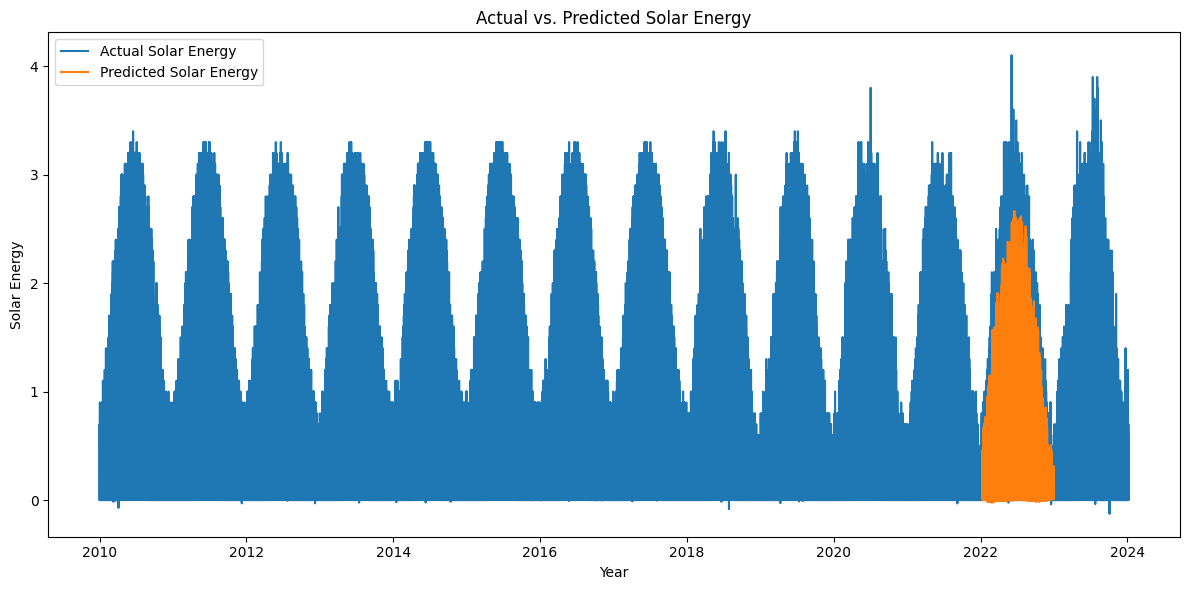

In [28]:
# Plotting validation against original data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['solarenergy'], label='Actual Solar Energy')
plt.plot(v_predictions_df.index, v_predictions_df['val_predictions'], label='Predicted Solar Energy')
plt.xlabel('Year')
plt.ylabel('Solar Energy')
plt.title('Actual vs. Predicted Solar Energy')
plt.legend()
plt.tight_layout()
plt.show()


The model doesn't seem to exactly follow the peaks. Checking how it behaves monthly

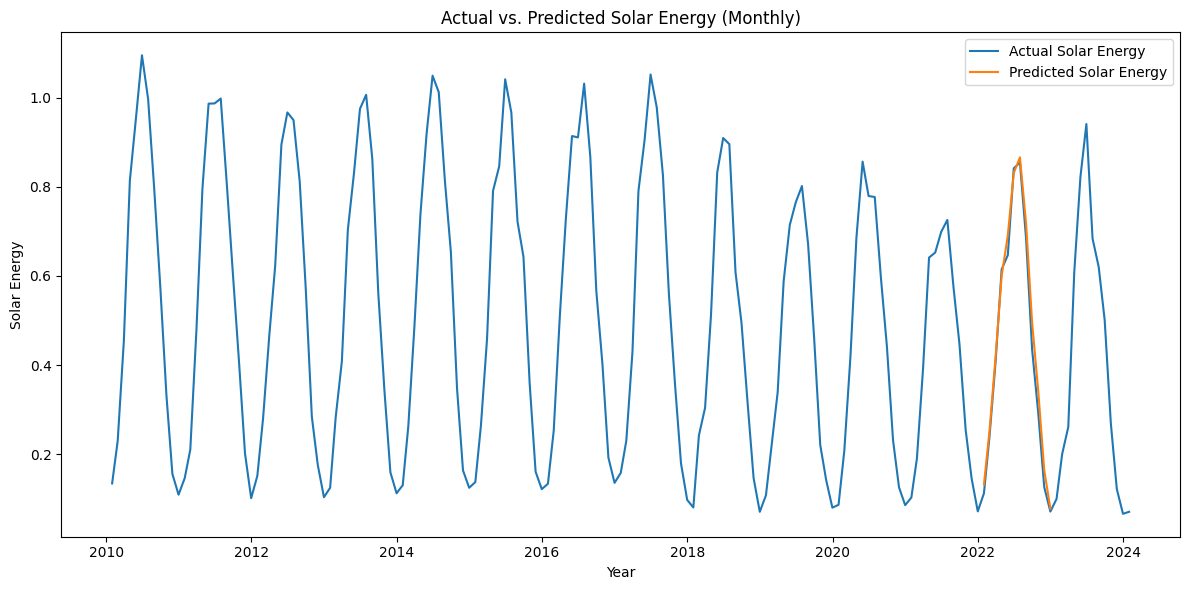

In [29]:
# Resampling data to monthly
df_monthly = df['solarenergy'].resample('M').mean()
v_predictions_df_monthly = v_predictions_df.resample('M').mean()

# Plotting val_data against original data
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly, label='Actual Solar Energy')
plt.plot(v_predictions_df_monthly.index, v_predictions_df_monthly['val_predictions'], label='Predicted Solar Energy')
plt.xlabel('Year')
plt.ylabel('Solar Energy')
plt.title('Actual vs. Predicted Solar Energy (Monthly)')
plt.legend()
plt.tight_layout()
plt.show()


except for predicting the peaks around mid year correctly, it follows the actual data nicely

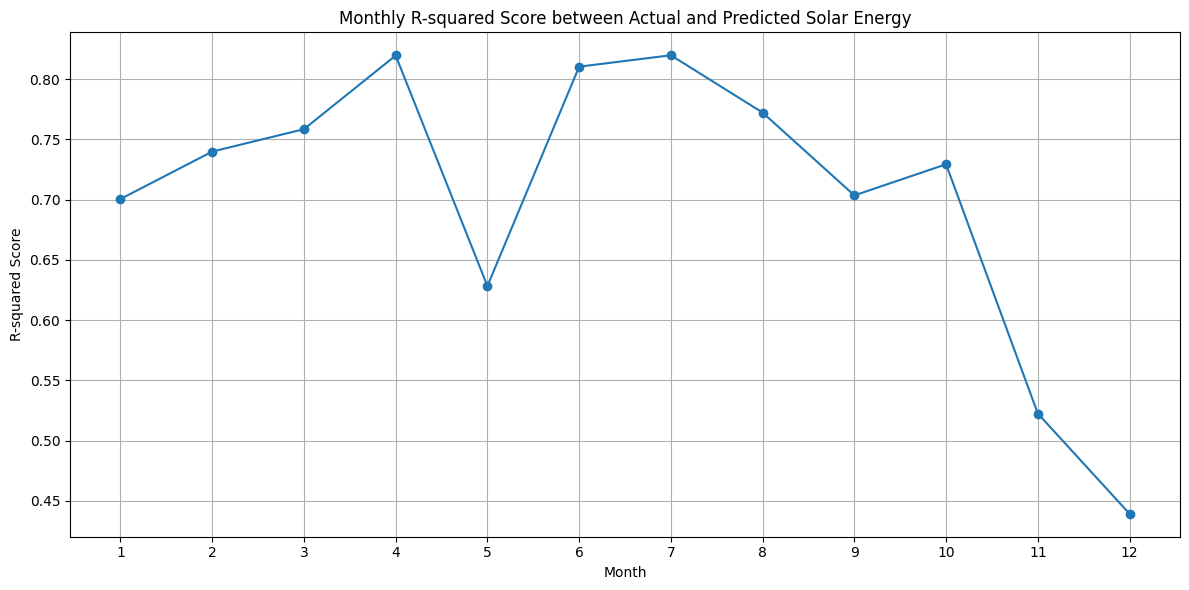

In [30]:
#checking performance for each month
df_se = df['solarenergy'].loc[v_predictions_df.index]
monthly_r2_scores = []

for month in range(1, 13):
    df_monthly_filtered = df_se.loc[df_se.index.month == month]
    v_pred_monthly = v_predictions_df[v_predictions_df.index.month == month]
    r2_monthly = r2_score(df_monthly_filtered, v_pred_monthly)
    monthly_r2_scores.append((month, r2_monthly))

monthly_r2_df = pd.DataFrame(monthly_r2_scores, columns=['Month', 'R2 Score'])

# Plotting monthly R2 scores
plt.figure(figsize=(12, 6))
plt.plot(monthly_r2_df['Month'], monthly_r2_df['R2 Score'], marker='o')
plt.xlabel('Month')
plt.ylabel('R-squared Score')
plt.title('Monthly R-squared Score between Actual and Predicted Solar Energy')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


The best performance of model is seen in April,June and July. It is seen to be not so good in May and November, and worst in December. Checking how the model works on the hourly basis.

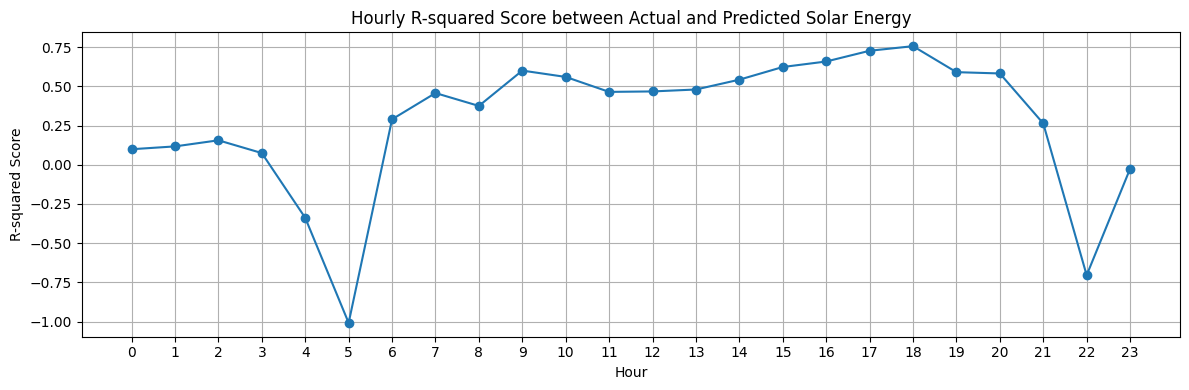

In [31]:
hourly_r2_scores = []
for hour in range(24):
    df_hourly_filtered = df_se[df_se.index.hour == hour]
    v_pred_hourly = v_predictions_df[v_predictions_df.index.hour == hour]
    r2_hourly = r2_score(df_hourly_filtered, v_pred_hourly)
    hourly_r2_scores.append((hour, r2_hourly))
hourly_r2_df = pd.DataFrame(hourly_r2_scores, columns=['Hour', 'R2 Score'])

# Plotting hourly R2 scores
plt.figure(figsize=(12, 4))
plt.plot(hourly_r2_df['Hour'], hourly_r2_df['R2 Score'], marker='o')
plt.xlabel('Hour')
plt.ylabel('R-squared Score')
plt.title('Hourly R-squared Score between Actual and Predicted Solar Energy')
plt.xticks(range(24))  # Show all hours on x-axis
plt.grid(True)
plt.tight_layout()
plt.show()


From 8am to 8pm the perfermance is acceptable. Checking in the best months for more insight.





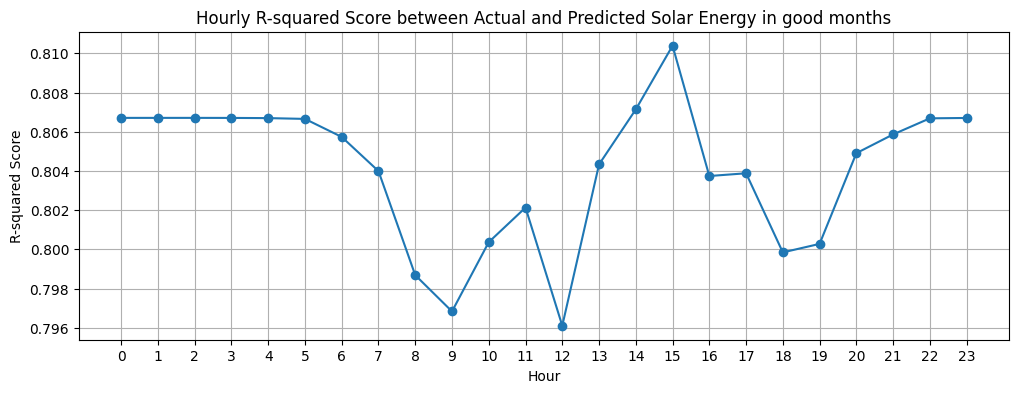

In [32]:
hourly_r2_scores = []
for hour in range(24):
    df_hourly_filtered = df_se[((df_se.index.month >= 1) & (df_se.index.month <= 4)) | ((df_se.index.month >= 6) & (df_se.index.month <= 10)) & (df_se.index.hour == hour)]
    v_pred_hourly = v_predictions_df[((v_predictions_df.index.month >= 1) & (v_predictions_df.index.month <= 4)) | ((v_predictions_df.index.month >= 6) & (v_predictions_df.index.month <= 10)) & (v_predictions_df.index.hour == hour)]
    r2_hourly = r2_score(df_hourly_filtered, v_pred_hourly)
    hourly_r2_scores.append((hour, r2_hourly))
hourly_r2_df = pd.DataFrame(hourly_r2_scores, columns=['Hour', 'R2 Score'])
plt.figure(figsize=(12, 4))
plt.plot(hourly_r2_df['Hour'], hourly_r2_df['R2 Score'], marker='o')
plt.xlabel('Hour')
plt.ylabel('R-squared Score')
plt.title('Hourly R-squared Score between Actual and Predicted Solar Energy in good months')
plt.xticks(range(24))
plt.grid(True)
plt.show()


During the day time the best performance can be seen from 1pm to 4pm.
Night till early morning predictions are good too but during exploration it was seen that solarenergy is minimum in those hours.

## Checking for surplus energy

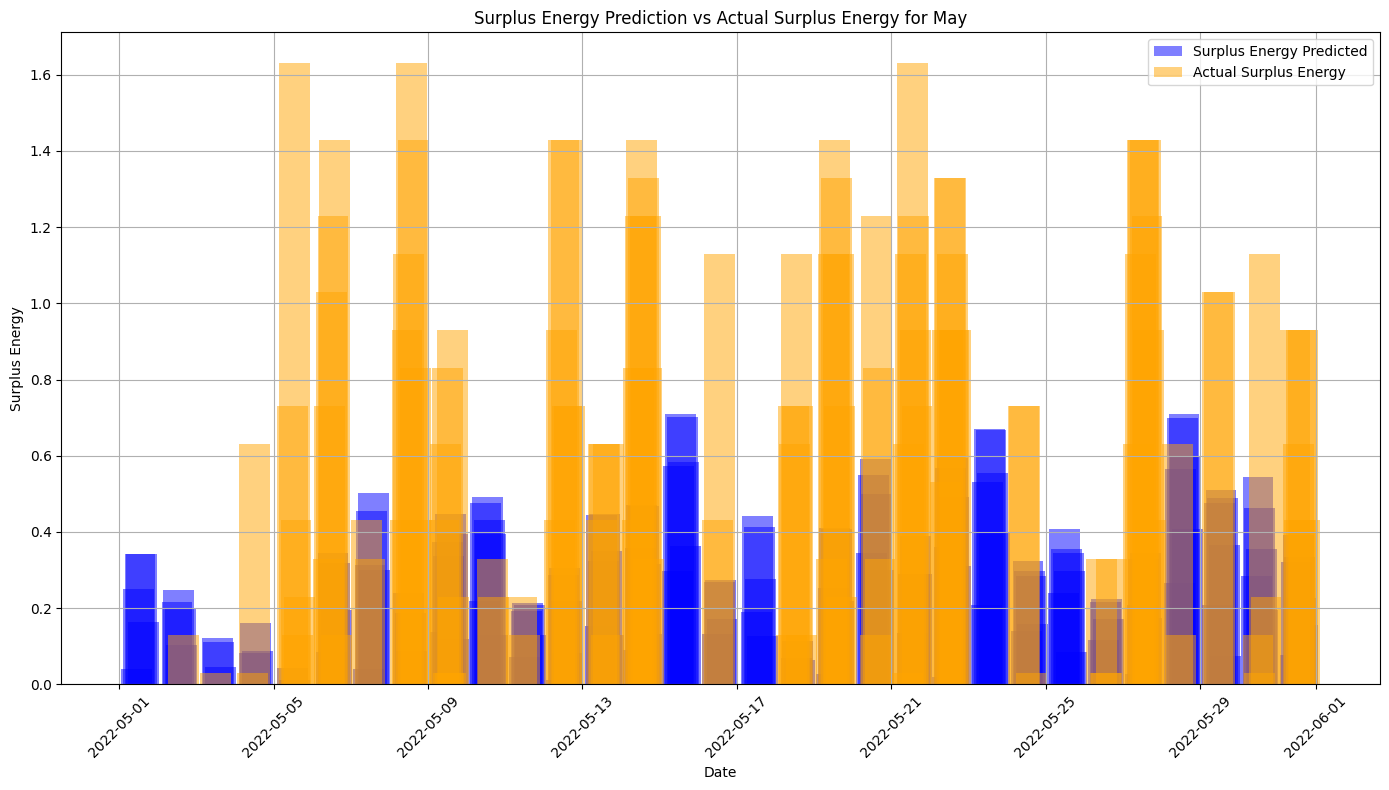

In [33]:
threshold = 1.67 # Solar energy threshhold for surplus energy
surplus_energy_pred = (v_predictions_df['val_predictions'] > threshold).astype(int)
v_predictions_df['surplus_energy_pred'] = surplus_energy_pred
merged_df = v_predictions_df.join(df[['solarenergy']], how='inner')
surplus_energy = (merged_df['solarenergy'] > threshold).astype(int)
merged_df['surplus_energy'] = surplus_energy
merged_df['surplus_val_pred'] = np.where(merged_df['surplus_energy_pred'] > 0, merged_df['val_predictions'] - threshold, 0)
merged_df['surplus_val'] = np.where(merged_df['surplus_energy'] > 0, merged_df['solarenergy'] - threshold, 0)

# Filtering the DataFrame to see when there is surplus of energy or predicted for may
filtered_df = merged_df[((merged_df['surplus_val_pred'] != 0) | (merged_df['surplus_val'] != 0)) & (merged_df.index.month == 5)]
# Plotting as a bar graph to check surplus energy values in May
plt.figure(figsize=(14, 8))
plt.bar(filtered_df.index, filtered_df['surplus_val_pred'], label='Surplus Energy Predicted', color='blue', alpha=0.5)  # Predicted surplus energy
plt.bar(filtered_df.index, filtered_df['surplus_val'], label='Actual Surplus Energy', color='orange', alpha=0.5)  # Actual surplus energy
plt.xlabel('Date')
plt.ylabel('Surplus Energy')
plt.title('Surplus Energy Prediction vs Actual Surplus Energy for May')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


It seems like our model cannot recognize the peak energy values. Also, there seems to be false positives too. Checking to see how our model behaves in the best month i.e. July.

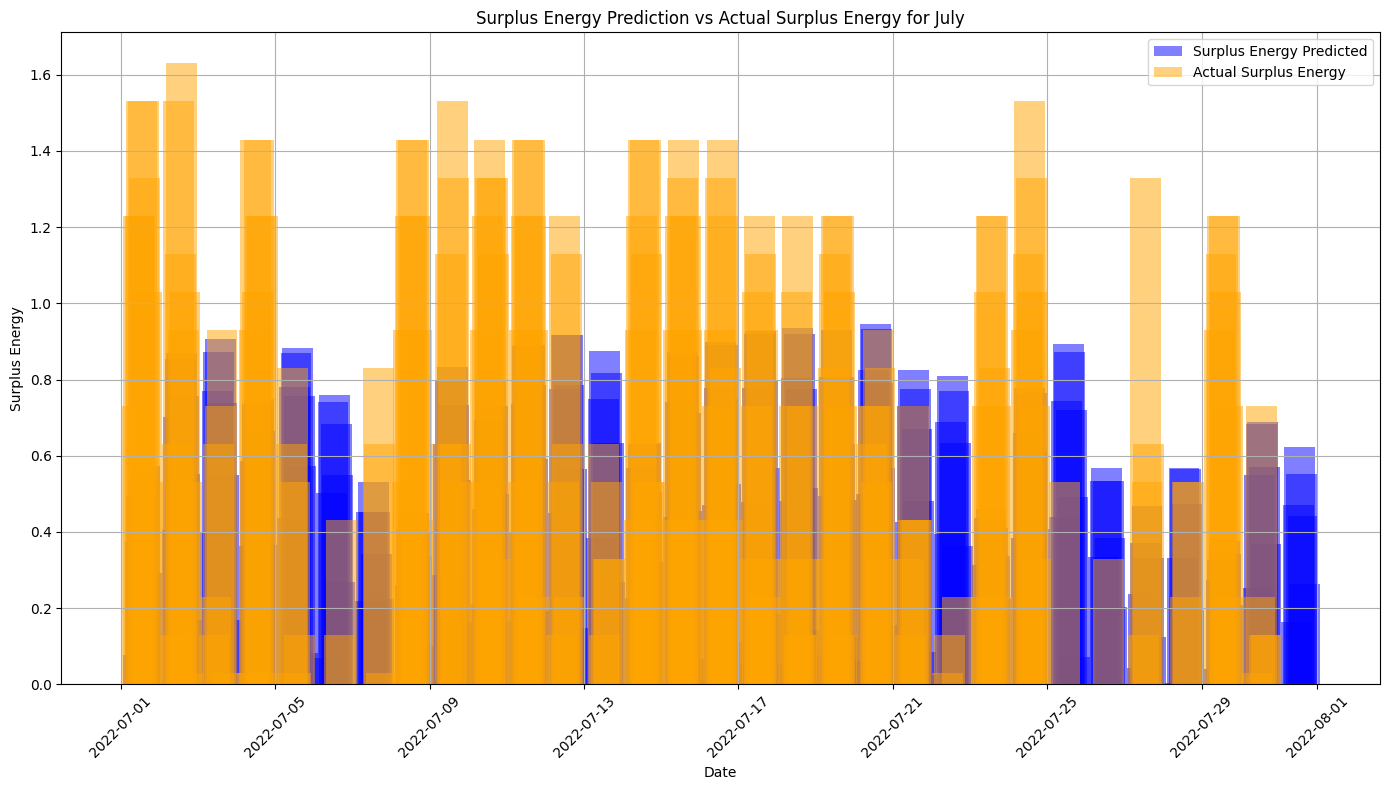

In [34]:
filtered_df = merged_df[((merged_df['surplus_val_pred'] != 0) | (merged_df['surplus_val'] != 0)) & (merged_df.index.month == 7)]
plt.figure(figsize=(14, 8))
plt.bar(filtered_df.index, filtered_df['surplus_val_pred'], label='Surplus Energy Predicted', color='blue', alpha=0.5)  #Predicted surplus energy
plt.bar(filtered_df.index, filtered_df['surplus_val'], label='Actual Surplus Energy', color='orange', alpha=0.5)  #Actual surplus energy
plt.xlabel('Date')
plt.ylabel('Surplus Energy')
plt.title('Surplus Energy Prediction vs Actual Surplus Energy for July')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Our model does seem to almost predict surplus whenever there is. However, it still never reaches the peaks. Some false positives are lucid too.

### Handeling false positives
Trying to reduce it by subtracting mae value from predicted value

In [35]:
merged_df['val_predictions_opt'] = merged_df['val_predictions']-mae_val

threshold = 1.67 # Solar energy threshhold for surplus energy
merged_df['surplus_energy_pred_new'] = (merged_df['val_predictions_opt'] > threshold).astype(int)
merged_df['surplus_val_pred_new'] = np.where(merged_df['surplus_energy_pred_new'] > 0, merged_df['val_predictions_opt'] - threshold, 0)

merged_df['false_positive_new'] = merged_df['surplus_energy_pred_new'] * merged_df['surplus_energy']
merged_df['false_positive_old'] = merged_df['surplus_energy_pred'] * merged_df['surplus_energy']

print(f"No. of times surplus energy predicted after optimizing falsely:{merged_df['false_positive_new'].sum()}")
print(f"No. of times surplus energy predicted before optimizing falsely:{merged_df['false_positive_old'].sum()}")
print(f"Actual positives:{merged_df['surplus_energy'].sum()}")




No. of times surplus energy predicted after optimizing falsely:541
No. of times surplus energy predicted before optimizing falsely:583
Actual positives:893


False positives did come down but not by too much.We can increase our threshold value a bit too to reduce it even more.
Conclusion:
- The model does have false positives however it never really reaches the peak values, which may be good for our scenario as even if we get false positives, it wouldn't be too high a value.
- It's only best that we deploy our model when there is good performace like in Jan to April and June to October specially from 1pm to 4pm in the day to minimize false positive.

---



# Main Model - Wind Energy

### Data prep

Since wind energy was stationary and not much seasonal, previous approach won't work because auto-correlation wasn't much between lagged data. Hence, treating it as multivariate timeseries for modeling.

In [36]:
df = pd.read_csv('aggregated_data.csv', index_col=0, parse_dates=True)
df.head()

,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,year,month,day,hour,week_of_year
2010-01-01 00:00:00,1.9,-0.5,84.25,0.417,100.0,"rain,snow",0.0,0.0,19.4,11.0,999.9,62.2,0.0,0.0,0.0,2010,1,1,0,53
2010-01-01 01:00:00,1.9,-0.5,83.90,0.000,0.0,na,0.0,0.0,21.8,19.0,999.8,22.4,0.0,0.0,0.0,2010,1,1,1,53
2010-01-01 02:00:00,1.4,-0.7,85.76,0.000,0.0,na,0.0,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,0.0,2010,1,1,2,53
2010-01-01 03:00:00,1.4,-0.7,85.69,0.000,0.0,na,0.0,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,0.0,2010,1,1,3,53
2010-01-01 04:00:00,1.3,-0.8,85.72,0.000,0.0,na,0.0,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,0.0,2010,1,1,4,53


In [37]:
train_data = pd.read_csv('train_data.csv', index_col=0, parse_dates=True)
test_data = pd.read_csv('test_data.csv', index_col=0, parse_dates=True)
val_data = pd.read_csv('val_data.csv', index_col=0, parse_dates=True)
train_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105192 entries, 2010-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   temp              105192 non-null  float64
 1   dew               105192 non-null  float64
 2   humidity          105192 non-null  float64
 3   precip            105192 non-null  float64
 4   precipprob        105192 non-null  float64
 5   preciptype        105192 non-null  object 
 6   snow              105192 non-null  float64
 7   snowdepth         105192 non-null  float64
 8   windspeed         105192 non-null  float64
 9   winddir           105192 non-null  float64
 10  sealevelpressure  105192 non-null  float64
 11  cloudcover        105192 non-null  float64
 12  solarradiation    105192 non-null  float64
 13  solarenergy       105192 non-null  float64
 14  uvindex           105192 non-null  float64
 15  year              105192 non-null 

In [38]:
#preparing for modeling
data = df.values
train = train_data.values
test = test_data.values
val = val_data.values
encoder = LabelEncoder()
data[:,5]=encoder.fit_transform(data[:,5])
train[:,5]=encoder.fit_transform(train[:,5])
test[:,5]=encoder.fit_transform(test[:,5])
val[:,5]=encoder.fit_transform(val[:,5])
scaler = MinMaxScaler()
scaled_data = scaler.fit(train)
data = scaler.transform(data)
train = scaler.transform(train)
test= scaler.transform(test)
val = scaler.transform(val)

In [39]:
y = df['windspeed'].values.reshape(-1, 1)
y_train = train_data['windspeed'].values.reshape(-1, 1)
y_test = test_data['windspeed'].values.reshape(-1, 1)
y_val = val_data['windspeed'].values.reshape(-1, 1)

In [40]:
from tensorflow import keras
#function to create modeling datasets
def create_set(x,y):
    sampling_rate = 1  #keeping all data points
    sequence_length = 24*7
    delay = sampling_rate*sequence_length+24-1 #the target is 24 hours ahead after the sequence
    batch_size = 32
    return keras.utils.timeseries_dataset_from_array(
    data=x[:-delay],
    targets=y[delay:],
    sampling_rate=sampling_rate, sequence_length=sequence_length,
    batch_size=batch_size,
    start_index=0, end_index=len(x[:-delay])-1
    )


In [41]:
train_dataset = create_set(train,y_train)
val_dataset = create_set(val,y_val)
test_dataset = create_set(test,y_test)
for X, target in train_dataset:
    print("X shape:", X.shape)  # checking if shape is like (batch_size, sequence_length, n_features)
    print("Target shape:", target.shape)
    break


X shape: (32, 168, 20)
Target shape: (32, 1)


In [42]:

sampling_rate = 1  # keeping all datapoints, no resampling
sequence_length = 24*7 # taking data for a week
delay = sampling_rate*sequence_length+24-1  # the target is 24 hours ahead after the sequence
batch_size = 32
l2_reg = 0.001  # regularizing to prevent overfitting
model_we = Sequential()
model_we.add(LSTM(20, input_shape=(sequence_length, len(df.columns)),
                           return_sequences=True,
                          kernel_regularizer=regularizers.l2(l2_reg)))
model_we.add(LSTM(20, input_shape=(sequence_length, len(df.columns)),

                          kernel_regularizer=regularizers.l2(l2_reg)))
model_we.add(Dropout(0.4))
model_we.add(Dense(1))

# Print model summary
model_we.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 168, 20)           3280      
                                                                 
 lstm_2 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6581 (25.71 KB)
Trainable params: 6581 (25.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# saving model and compiling
cp2 = ModelCheckpoint('model2/model_we.keras', save_best_only=True)
model_we.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])


In [44]:
history_we = model_we.fit(train_dataset, epochs=20,validation_data=val_dataset,callbacks=[cp2])

Epoch 1/20
3277/3277 [==============================] - 63s 18ms/step - loss: 97.0743 - mae: 7.6963 - val_loss: 70.4656 - val_mae: 6.5033
Epoch 2/20
3277/3277 [==============================] - 58s 18ms/step - loss: 87.1176 - mae: 7.3560 - val_loss: 70.4379 - val_mae: 6.4988
Epoch 3/20
3277/3277 [==============================] - 58s 18ms/step - loss: 85.1764 - mae: 7.2508 - val_loss: 64.1856 - val_mae: 6.0905
Epoch 4/20
3277/3277 [==============================] - 58s 18ms/step - loss: 78.2697 - mae: 6.8724 - val_loss: 61.4286 - val_mae: 5.9383
Epoch 5/20
3277/3277 [==============================] - 58s 18ms/step - loss: 75.5119 - mae: 6.7421 - val_loss: 61.1989 - val_mae: 5.8673
Epoch 6/20
3277/3277 [==============================] - 58s 18ms/step - loss: 74.1527 - mae: 6.6719 - val_loss: 60.4191 - val_mae: 5.8495
Epoch 7/20
3277/3277 [==============================] - 59s 18ms/step - loss: 73.6990 - mae: 6.6559 - val_loss: 59.7073 - val_mae: 5.8218
Epoch 8/20
3277/3277 [============

In [45]:
model2 = load_model('model2/model_we.keras')

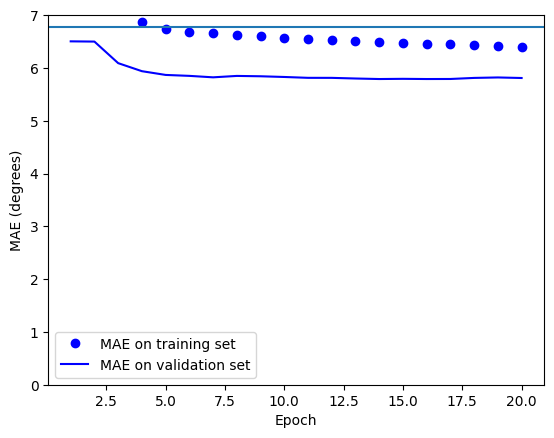

In [46]:

n_ = len(history_we.history['mae'])
plt.plot(range(1, n_+1), np.asarray(history_we.history['mae']), 'bo', label='MAE on training set')
plt.plot(range(1, n_+1), np.asarray(history_we.history['val_mae']), 'b', label='MAE on validation set')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MAE (degrees)")
plt.ylim([0, 7])
plt.axhline(y=6.77)
plt.show()

In [47]:
val_predictions = model2.predict(val_dataset).flatten() #predicting validation set

263/263 [==============================] - 3s 9ms/step


In [48]:
mae_val_ws = model2.evaluate(val_dataset)[1]
print('MAE on val data: %.2f degrees' % mae_val_ws)


263/263 [==============================] - 4s 9ms/step - loss: 58.4348 - mae: 5.7934
MAE on val data: 5.79 degrees


In [49]:
print('MAE on test data: %.2f degrees' % model2.evaluate(test_dataset)[1])

267/267 [==============================] - 2s 9ms/step - loss: 67.5110 - mae: 6.3087
MAE on test data: 6.31 degrees


The model has less MAE in validation set than training and the baseline which is good. However, the MAE on test set is a bit high.

In [50]:
# linking back values to date
v_predictions_df = pd.DataFrame(val_predictions)
v_predictions_df.columns = ['val_predictions']
index = pd.date_range(start="2022-01-08 23:00:00", periods=len(val_predictions), freq='H')
v_predictions_df.index = index
v_predictions_df.index.name = 'datetime'

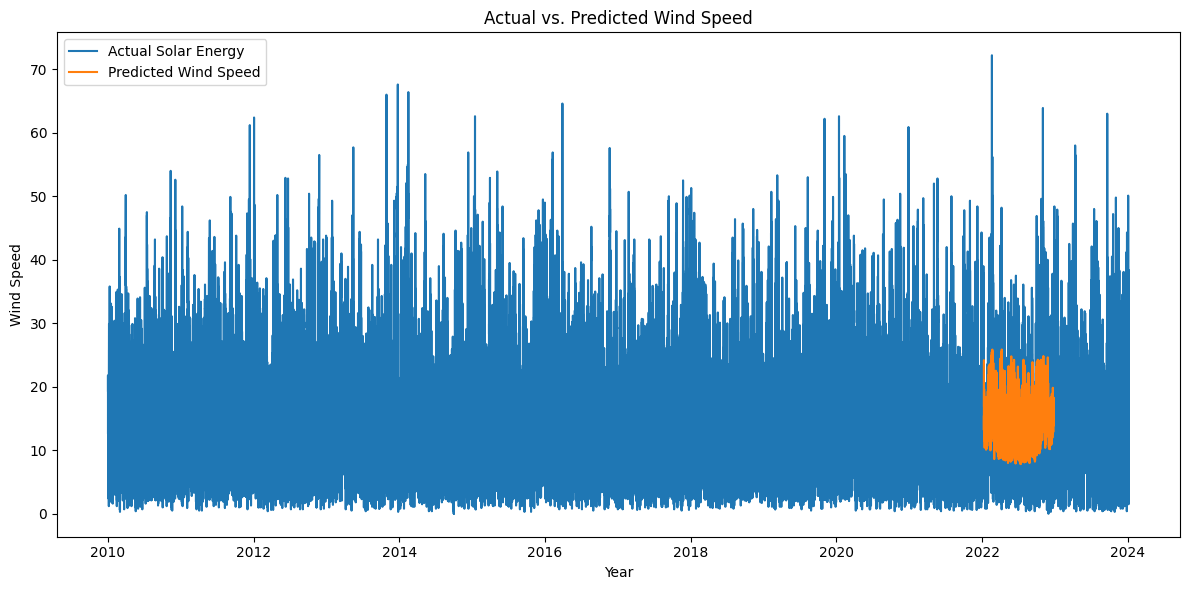

In [51]:
# Plotting validation against original data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['windspeed'], label='Actual Solar Energy')
plt.plot(v_predictions_df.index, v_predictions_df['val_predictions'], label='Predicted Wind Speed')
plt.xlabel('Year')
plt.ylabel('Wind Speed')
plt.title('Actual vs. Predicted Wind Speed')
plt.legend()
plt.tight_layout()
plt.show()


The model's predictions are not impressive. It cannot recognize the highs and the lows. Checking how it behaves on monthly basis.

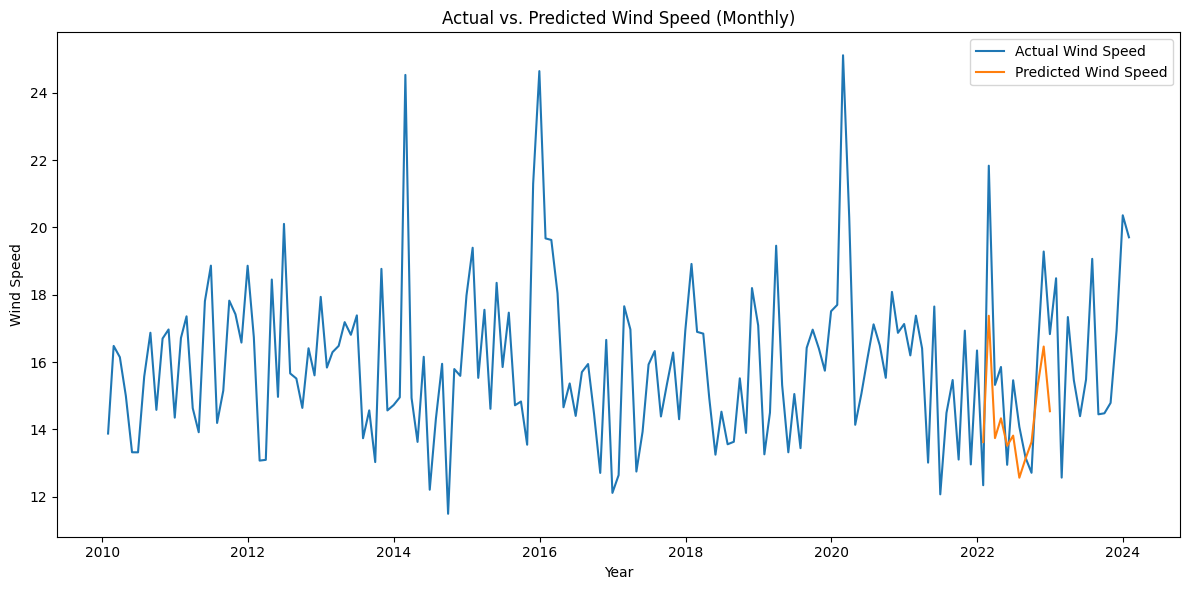

In [52]:
# Resampling data to monthly
df_monthly = df['windspeed'].resample('M').mean()
v_predictions_df_monthly = v_predictions_df.resample('M').mean()

# Plotting val_data against original data
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly, label='Actual Wind Speed')
plt.plot(v_predictions_df_monthly.index, v_predictions_df_monthly['val_predictions'], label='Predicted Wind Speed')
plt.xlabel('Year')
plt.ylabel('Wind Speed')
plt.title('Actual vs. Predicted Wind Speed (Monthly)')
plt.legend()
plt.tight_layout()
plt.show()


Our model does seem to follow the trend however it is more compressed towards its mean.

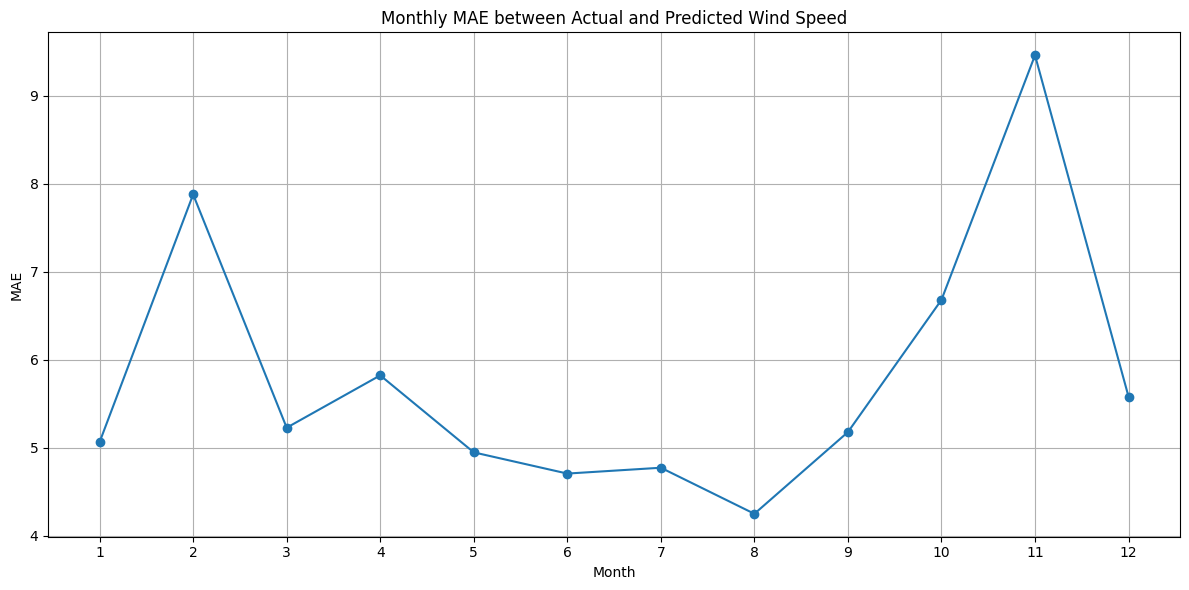

In [53]:
#checking performance for each month
df_we = df['windspeed'].loc[v_predictions_df.index]
monthly_scores = []

for month in range(1, 13):
    df_monthly_filtered = df_we.loc[df_we.index.month == month]
    v_pred_monthly = v_predictions_df[v_predictions_df.index.month == month]
    mae_monthly = mean_absolute_error(df_monthly_filtered, v_pred_monthly)
    monthly_scores.append((month, mae_monthly))

monthly_mae_df = pd.DataFrame(monthly_scores, columns=['Month', 'mae'])

# Plotting monthly mae
plt.figure(figsize=(12, 6))
plt.plot(monthly_mae_df['Month'], monthly_mae_df['mae'], marker='o')
plt.xlabel('Month')
plt.ylabel('MAE')
plt.title('Monthly MAE between Actual and Predicted Wind Speed')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


The model performs at its best in August and worst in November. Its performance is acceptable in months January, March-September, and December.

### Checking for surplus energy

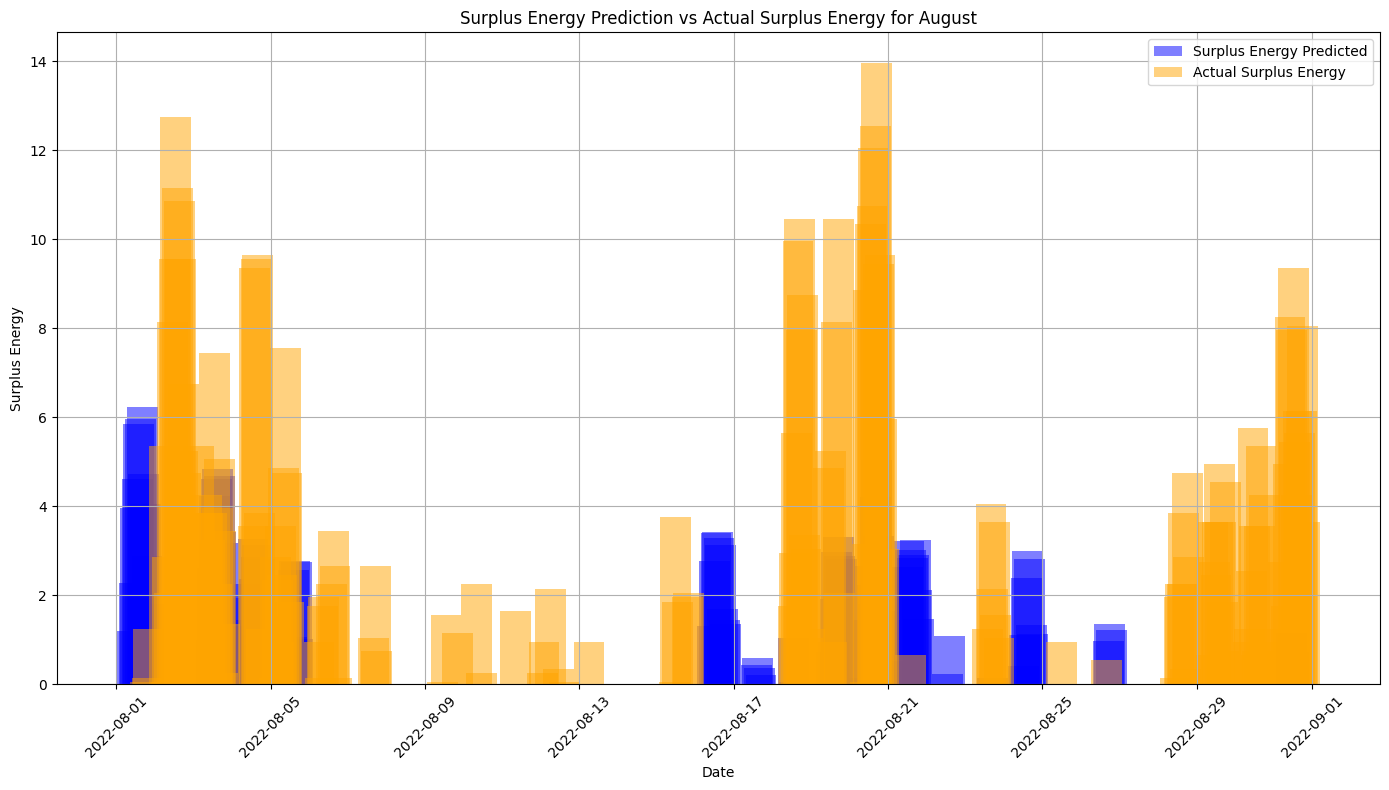

In [54]:
threshold = 17.15 # Windspeed threshhold for surplus energy
surplus_energy_pred = (v_predictions_df['val_predictions'] > threshold).astype(int)
v_predictions_df['surplus_energy_pred'] = surplus_energy_pred
merged_df = v_predictions_df.join(df[['windspeed']], how='inner')
surplus_energy = (merged_df['windspeed'] > threshold).astype(int)
merged_df['surplus_energy'] = surplus_energy
merged_df['surplus_val_pred'] = np.where(merged_df['surplus_energy_pred'] > 0, merged_df['val_predictions'] - threshold, 0)
merged_df['surplus_val'] = np.where(merged_df['surplus_energy'] > 0, merged_df['windspeed'] - threshold, 0)

filtered_df = merged_df[((merged_df['surplus_val_pred'] != 0) | (merged_df['surplus_val'] != 0)) & (merged_df.index.month == 8)]
# Plotting as a bar graph to check surplus energy values in May
plt.figure(figsize=(14, 8))
plt.bar(filtered_df.index, filtered_df['surplus_val_pred'], label='Surplus Energy Predicted', color='blue', alpha=0.5)  # Predicted surplus energy
plt.bar(filtered_df.index, filtered_df['surplus_val'], label='Actual Surplus Energy', color='orange', alpha=0.5)  # Actual surplus energy
plt.xlabel('Date')
plt.ylabel('Surplus Energy')
plt.title('Surplus Energy Prediction vs Actual Surplus Energy for August')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Even in its best month, the model doesn't seem to capture good no. of days where the surplus energy is present. Some false positives are there too.

### Checking for false positives


In [55]:
merged_df['val_predictions_opt'] = merged_df['val_predictions']-mae_val_ws

threshold = 17.15 # Wind speed threshhold for surplus energy
merged_df['surplus_energy_pred_new'] = (merged_df['val_predictions_opt'] > threshold).astype(int)
merged_df['surplus_val_pred_new'] = np.where(merged_df['surplus_energy_pred_new'] > 0, merged_df['val_predictions_opt'] - threshold, 0)

merged_df['false_positive_new'] = merged_df['surplus_energy_pred_new'] * merged_df['surplus_energy']
merged_df['false_positive_old'] = merged_df['surplus_energy_pred'] * merged_df['surplus_energy']

print(f"No. of times surplus energy predicted after optimizing:{merged_df['false_positive_new'].sum()}")
print(f"No. of times surplus energy predicted before optimizing:{merged_df['false_positive_old'].sum()}")
print(f"Actual positives:{merged_df['surplus_energy'].sum()}")
print(f"predicted actual positives:{merged_df['surplus_energy_pred_new'].sum()-merged_df['false_positive_new'].sum()}")



No. of times surplus energy predicted after optimizing:128
No. of times surplus energy predicted before optimizing:998
Actual positives:2802
predicted actual positives:55


This approach doesn't seem to work since our actual positves have dropped drastically. Trying another approach with a little increased threshhold value.


In [56]:
threshold = 18 # new Wind speed threshhold for surplus energy
merged_df['surplus_energy_pred_new'] = (merged_df['val_predictions'] > threshold).astype(int)
merged_df['surplus_val_pred_new'] = np.where(merged_df['surplus_energy_pred_new'] > 0, merged_df['val_predictions'] - threshold, 0)

merged_df['false_positive_new'] = merged_df['surplus_energy_pred_new'] * merged_df['surplus_energy']
merged_df['false_positive_old'] = merged_df['surplus_energy_pred'] * merged_df['surplus_energy']

print(f"No. of times surplus energy predicted after optimizing:{merged_df['false_positive_new'].sum()}")
print(f"No. of times surplus energy predicted before optimizing:{merged_df['false_positive_old'].sum()}")
print(f"Actual positives:{merged_df['surplus_energy'].sum()}")
print(f"predicted actual positives with new threshold:{merged_df['surplus_energy_pred_new'].sum()-merged_df['false_positive_new'].sum()}")
print(f"predicted actual positives:{merged_df['surplus_energy_pred'].sum()-merged_df['false_positive_old'].sum()}")




No. of times surplus energy predicted after optimizing:800
No. of times surplus energy predicted before optimizing:998
Actual positives:2802
predicted actual positives with new threshold:501
predicted actual positives:707


There are still a lot of false positves and predicted actual positives are far too low than what actually is. This model is not a good fit. Catching all the highs and lows of the true data is important for improving.